In [2]:
#run_to_convert_notebooks_to_python_file

!jupyter nbconvert --to python preprocess_eeg_data.ipynb
!jupyter nbconvert --to python Read_data.ipynb
!jupyter nbconvert --to python Traning_Models.ipynb
!jupyter nbconvert --to python Extract_Window_Data.ipynb
!jupyter nbconvert --to python Final_Predictions_on_raw_data.ipynb
!jupyter nbconvert --to python Plot_Epoched_data.ipynb
!jupyter nbconvert --to python Feature_Extraction.ipynb
!jupyter nbconvert --to python Feature_extraction_all_channels.ipynb
!jupyter nbconvert --to python Feature_Extraction_Parallel.ipynb
!jupyter nbconvert --to python Feature_extraction_all_channels_Parallel
!jupyter nbconvert --to python Traning_LSTM

[NbConvertApp] Converting notebook preprocess_eeg_data.ipynb to python
[NbConvertApp] Writing 3522 bytes to preprocess_eeg_data.py
[NbConvertApp] Converting notebook Read_data.ipynb to python
[NbConvertApp] Writing 325 bytes to Read_data.py
[NbConvertApp] Converting notebook Traning_Models.ipynb to python
[NbConvertApp] Writing 4711 bytes to Traning_Models.py
[NbConvertApp] Converting notebook Extract_Window_Data.ipynb to python
[NbConvertApp] Writing 2396 bytes to Extract_Window_Data.py
[NbConvertApp] Converting notebook Final_Predictions_on_raw_data.ipynb to python
[NbConvertApp] Writing 5237 bytes to Final_Predictions_on_raw_data.py
[NbConvertApp] Converting notebook Plot_Epoched_data.ipynb to python
[NbConvertApp] Writing 2696 bytes to Plot_Epoched_data.py
[NbConvertApp] Converting notebook Feature_Extraction.ipynb to python
[NbConvertApp] Writing 3608 bytes to Feature_Extraction.py
[NbConvertApp] Converting notebook Feature_extraction_all_channels.ipynb to python
[NbConvertApp] Wr

In [2]:
import mne
import numpy as np
from datetime import datetime
import pandas as pd

In [20]:
from preprocess_eeg_data import preprocess_eeg_data
from Read_data import load_data
#from Traning_Models2 import train_models_and_save
from Extract_Window_Data import extract_window_data
from Final_Predictions_on_raw_data import predict_events
from Final_Predictions_on_raw_data import save_event_times
from Plot_Epoched_data import plot_eeg_features
#from Feature_Extraction import extract_features
#from Feature_extraction_all_channels import extract_combined_features
from Feature_Extraction_Parallel import extract_features
from Feature_extraction_all_channels_Parallel import extract_combined_features
from Traning_LSTM import lstm_model
from Traning_Models import train_models_and_save_raw_data
from Traning_Models import train_models_and_save_feature_extracted_data

ModuleNotFoundError: No module named 'tensorflow'

In [18]:
pip install tensorflow


     -------------------------------------- 272.8/272.8 MB 5.1 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.3/1.3 MB 11.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     --------------------------------------- 24.4/24.4 MB 10.2 MB/s eta 0:00:00
     --------------------------------------- 14.6/14.6 MB 11.7 MB/s eta 0:00:00
     ------------------------------------- 422.5/422.5 kB 13.3 MB/s eta 0:00:00
     --------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\kanka\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [ ]:
#concatenate_epochs_all_subjects

# Define the parameters for the function
subject_ids = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14']
file_path = 'DATA/Data_Artifact_Layer/PTW{sub_id}_allwalk_artifact.set'
#file_path = 'DATA/Data_Inner_Layer/PTW{sub_id}_allwalk_EEG.set'
event_id = {'ULHS': 11, 'ULTO': 13, 'URHS': 14, 'URTO': 15}
#event_id = {'PLHS': 6, 'PLTO': 8, 'PRHS': 9, 'PRTO': 10}
#save_dir = 'DATA/Event_Epoched_Data_Artifact_Layer_128_0.05'
save_dir = 'DATA/Event_Epoched_Data_Artifact_Layer_78_0.05'
#save_dir = 'DATA/Event_Epoched_Data_Inner_Layer_128_0.05'
#save_dir = 'DATA/Event_Epoched_Data_Inner_Layer_128_P'
#save_dir = 'DATA/Event_Epoched_Data_Inner_Layer_78_0.05'
#save_dir = 'DATA/Event_Epoched_Data_Inner_Layer_78_P'
use_78_channels = True

# Call the function
all_data=preprocessed_data = preprocess_eeg_data(subject_ids, file_path, event_id, save_dir, use_78_channels)


# Call the function
#all_data = preprocess_eeg_data(subject_ids, file_path, event_id, save_dir)



In [35]:

#Read the data

#define the event_ids
event_id = ('ULHS', 'ULTO', 'URHS', 'URTO')
#event_id = ('PLHS', 'PLTO', 'PRHS', 'PRTO')
#file_path = 'DATA\Event_Epoched_Data_Artifact_Layer_128_0.05'
#file_path = 'DATA\Event_Epoched_Data_Artifact_Layer_78_0.05'
#file_path = 'DATA\Event_Epoched_Data_Inner_Layer_128_0.05'
#file_path = 'DATA\Event_Epoched_Data_Inner_Layer_78_0.05'
#file_path = 'DATA/Event_Epoched_Data_ICA_78'
#file_path = 'DATA\Event_Epoched_Data_Inner_Layer_78_P'
#store the concatenate in all_epochs 
all_data = load_data(event_id, file_path)

FileNotFoundError: File does not exist: C:\Users\kanka\RA_Sem_2\DATA\Event_Epoched_Data_Inner_Layer_78_P\my_epochs_ULHS-epo.fif

In [14]:
all_data

Number of events,2
Events,ULHS: 2
Time range,-0.051 – 0.051 sec
Baseline,-0.051 – 0.000 sec


In [5]:
all_data.get_data()

array([[[-5.63817783e-07,  2.24351639e-06,  2.83243913e-06, ...,
          9.87597649e-06,  8.95040982e-06,  9.55030053e-06],
        [-7.66549071e-07,  9.53731095e-07,  1.30715570e-06, ...,
         -2.02809145e-06, -3.92585446e-06, -5.15477515e-06],
        [-8.29463671e-06, -6.22789906e-06, -3.86469816e-06, ...,
         -8.26957891e-06, -1.15064430e-05, -1.11008959e-05],
        ...,
        [-1.05659923e-05, -7.66250705e-06, -7.29122495e-06, ...,
         -6.30962323e-06, -7.89376639e-06, -5.68557310e-06],
        [-1.38274659e-05, -7.60855241e-06, -8.25329394e-06, ...,
         -7.83084626e-06, -9.72153563e-06, -7.77981849e-06],
        [-1.68882846e-05, -1.09644536e-05, -1.04102534e-05, ...,
         -8.30999844e-06, -1.13556728e-05, -7.79655259e-06]],

       [[ 4.99474614e-06,  5.60725777e-06,  3.24426001e-06, ...,
         -1.90323096e-06, -3.26215630e-06, -7.65502450e-07],
        [-7.13876007e-06, -6.76504467e-06, -5.97848986e-06, ...,
          1.97394896e-06,  1.59279728e

In [9]:
#reducing the data for testing the code

ULHS_samples = all_data[0:100]
ULTO_samples = all_data[11034:11134]
URHS_samples = all_data[22068:22168]
URTO_samples = all_data[33102:33202]

# Concatenate the EpochsArray objects
data = mne.concatenate_epochs([ULHS_samples, ULTO_samples, URHS_samples, URTO_samples])

# Print the information about the concatenated epochs
print(data)
print(data.get_data().shape)


Not setting metadata
400 matching events found
Applying baseline correction (mode: mean)
<EpochsArray |  400 events (all good), -0.0507812 - 0.0507812 sec, baseline -0.0507812 – 0 sec, ~12.7 MB, data loaded,
 'ULHS': 100
 'ULTO': 100
 'URHS': 100
 'URTO': 100>
(400, 78, 53)


In [10]:
#passing data to train LSTM model
#the model is stored in .h5 file
model, history = lstm_model(data, 'output')
from tensorflow.keras.models import load_model

# Load the LSTM model from the HDF5 file
loaded_model = load_model('output/LSTM.h5')


Epoch 1/100
10/10 [==============================] - 4s 102ms/step - loss: 1.3999 - accuracy: 0.2313 - val_loss: 1.3247 - val_accuracy: 0.3500
Epoch 2/100
10/10 [==============================] - 0s 27ms/step - loss: 1.2913 - accuracy: 0.4000 - val_loss: 1.3142 - val_accuracy: 0.3625
Epoch 3/100
10/10 [==============================] - 0s 27ms/step - loss: 1.2299 - accuracy: 0.4250 - val_loss: 1.2872 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 0s 28ms/step - loss: 1.1845 - accuracy: 0.4594 - val_loss: 1.2637 - val_accuracy: 0.4375
Epoch 5/100
10/10 [==============================] - 0s 27ms/step - loss: 1.0998 - accuracy: 0.5594 - val_loss: 1.2293 - val_accuracy: 0.4500
Epoch 6/100
10/10 [==============================] - 0s 28ms/step - loss: 1.0531 - accuracy: 0.5562 - val_loss: 1.2143 - val_accuracy: 0.4125
Epoch 7/100
10/10 [==============================] - 0s 28ms/step - loss: 0.9966 - accuracy: 0.5719 - val_loss: 1.2131 - val_accuracy: 0.4375
Epoch

In [6]:
all_data

Number of events,44136
Events,ULHS: 11034ULTO: 11034URHS: 11034URTO: 11034
Time range,-0.051 – 0.051 sec
Baseline,-0.051 – 0.000 sec


In [30]:
# Extract labels for epochs
epoch_labels = np.array([all_data[i].events[0][2] for i in range(len(all_data))], dtype='U')
np.savetxt('epoch_labels_test.csv', epoch_labels, delimiter=',', header='epoch', comments='', fmt='%s')

In [11]:
loaded_model

In [7]:
all_data=all_data[:2]

In [8]:
#feature extraction averaged across all channels

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

feature_df = extract_features(all_data)
# Save the combined feature DataFrame to a CSV file
feature_df.to_csv('feature_test.csv', index=False)


now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 23:26:32


Extracting features: 100%|███████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 45.44it/s]


Current Time = 23:26:41


In [9]:
# feature Extraction across all_chanells
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
combined_feature_df = extract_combined_features(all_data)
# Save the combined feature DataFrame to a CSV file
combined_feature_df.to_csv('combined_feature_test.csv', index=False)
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 23:26:42


Extracting combined features: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 71.61it/s]


Current Time = 23:26:46


In [10]:
# Read the feature.csv file into variable X
X = pd.read_csv('feature (13).csv')

# Read the epoch_labels.csv file into variable y
y = pd.read_csv('epoch_labels.csv')

In [11]:
#train the Models on the features extracted

#train the Models
#save_dir = 'Trained_Models\Trained_models_Artifact_Layer_128_0.05_f_a'
save_dir='output'
train_models_and_save_feature_extracted_data(X,y, save_dir)

C:\Users\kanka\RA_Sem_2\Traning_Models2.py:102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Accuracy: 0.5667723977213879
              precision    recall  f1-score   support

          11       0.53      0.54      0.53      7705
          13       0.55      0.57      0.56      7693
          14       0.59      0.59      0.59      7721
          15       0.60      0.57      0.58      7777

    accuracy                           0.57     30896
   macro avg       0.57      0.57      0.57     30896
weighted avg       0.57      0.57      0.57     30896

[[4151 1169 1659  726]
 [1094 4376  657 1566]
 [1783  699 4562  677]
 [ 797 1716  842 4422]]


In [16]:
#train the Models raw data
save_dir = 'output'
train_models_and_save_raw_data(all_data, save_dir)

Random Forest Accuracy: 0.4564344899016054
              precision    recall  f1-score   support

          11       0.43      0.45      0.44      7705
          13       0.43      0.45      0.44      7693
          14       0.46      0.45      0.45      7721
          15       0.51      0.48      0.49      7777

    accuracy                           0.46     30896
   macro avg       0.46      0.46      0.46     30896
weighted avg       0.46      0.46      0.46     30896

[[3433 1479 1814  979]
 [1314 3473 1142 1764]
 [1961 1417 3443  900]
 [1191 1787 1046 3753]]


In [6]:
#make predictions on the final raw eeg file

In [17]:
file_path = 'Data\Data_Artifact_Layer\PTW01_allwalk_artifact.set'

event_dict = {'CLHS': 1, 'CLP_On': 2, 'CLTO': 3, 'CRHS': 4, 'CRTO': 5,
              'PLHS': 6, 'PLP_On': 7, 'PLTO': 8, 'PRHS': 9, 'PRTO': 10,
              'ULHS': 11, 'ULP_On': 12, 'ULTO': 13, 'URHS': 14, 'URTO': 15,
              'boundary': 16}

window_times = [(0, 250), (500, 750)]

save_dir = "DATA\Windowed_data"

window_data = extract_window_data(file_path, event_dict, 'ULHS', 'ULTO', window_times, save_dir)

Reading C:\Users\kanka\RA_Sem_2\Data\Data_Artifact_Layer\PTW01_allwalk_artifact.fdt


C:\Users\kanka\RA_Sem_2\Extract_Window_Data.py:13: RuntimeWarning: Estimated head radius (11.3 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(file_path)


Used Annotations descriptions: ['CLHS', 'CLP_On', 'CLTO', 'CRHS', 'CRTO', 'PLHS', 'PLP_On', 'PLTO', 'PRHS', 'PRTO', 'ULHS', 'ULP_On', 'ULTO', 'URHS', 'URTO', 'boundary']


C:\Users\kanka\RA_Sem_2\Extract_Window_Data.py:13: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path)


In [18]:
window_data

[    Event Name        Time  Sample Number
 0         ULHS   25.544922          13079
 1       ULP_On   25.560547          13087
 2         URTO   25.835938          13228
 3         URHS   26.328125          13480
 4         ULTO   26.585938          13612
 ..         ...         ...            ...
 500       ULHS  139.880859          71619
 501     ULP_On  139.896484          71627
 502       URTO  140.060547          71711
 503       URHS  140.457031          71914
 504       ULTO  140.630859          72003
 
 [505 rows x 3 columns],
      Event Name        Time  Sample Number
 2575       ULHS  620.974609         317939
 2576     ULP_On  620.988281         317946
 2577       URTO  621.164062         318036
 2578       URHS  621.574219         318246
 2579       ULTO  621.734375         318328
 ...         ...         ...            ...
 3090       ULHS  739.167969         378454
 3091     ULP_On  739.183594         378462
 3092       URTO  739.361328         378553
 3093       URHS 

In [22]:
# Load the raw data
raw_data = mne.io.read_raw_eeglab('Data\Data_Artifact_Layer\PTW01_allwalk_artifact.set')

model_path='Trained_Models/Trained_models_Artifact_Layer_128/SVM Accuracy.pkl'

# Assuming you have imported the necessary libraries and have loaded your raw data and set the model path

# Call the function and pass the required parameters
#def predict_events(raw_data, model_path, window_size, step_size, threshold=0.5, tmin=None, tmax=None):
event_preds_times = predict_events(raw_data, model_path, window_size=0.201171875, step_size=0.001,t_min=40,t_max=41, threshold=0.5)

# Print the predicted events and their times
#print(event_preds_times)


In [8]:
# call the save_event_times function
output_dir = 'Final_Prediction/Test'
save_event_times(event_preds_times, output_dir)

In [34]:
#plots if required for analysis

# Load your raw EEG data file
raw_file_path ='DATA/Data_Inner_Layer/PTW01_allwalk_EEG.set'

# Load the epochs object (replace this with your actual epochs loading procedure)
epochs = all_data

# List of channel indices to plot
z = [0, 1, 2]

# List of plots to print (optional, remove or set to None to print all plots)
plots_to_print = ["interactive_plot"]

# Call the function
plot_eeg_features(raw_file_path, epochs, z, plots_to_print)


Reading C:\Users\kanka\RA_Sem_2\DATA\Data_Inner_Layer\PTW01_allwalk_EEG.fdt
Reading 0 ... 1536511  =      0.000 ...  3000.998 secs...


C:\Users\kanka\RA_Sem_2\Plot_Epoched_data.py:27: RuntimeWarning: Estimated head radius (11.3 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(raw_file_path, preload=True)
C:\Users\kanka\RA_Sem_2\Plot_Epoched_data.py:27: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_file_path, preload=True)


interactive(children=(FloatSlider(value=1500.4, description='t', max=3000.998046875), Output()), _dom_classes=…

In [28]:
all_data

Number of events,44136
Events,ULHS: 11034ULTO: 11034URHS: 11034URTO: 11034
Time range,-0.051 – 0.051 sec
Baseline,-0.051 – 0.000 sec


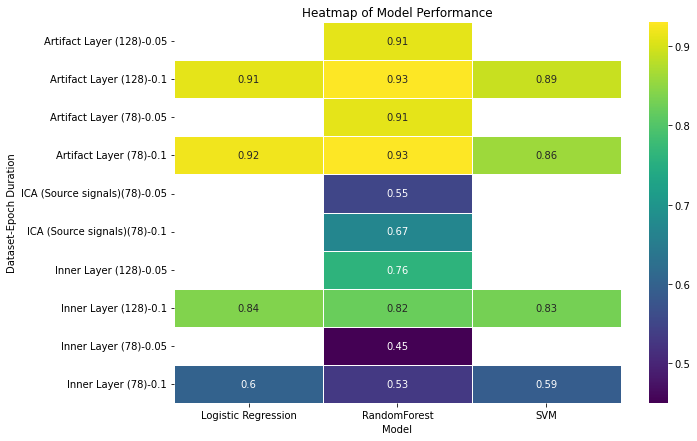

In [26]:
#not in the code
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

datasets = ['Inner Layer (128)', 'Inner Layer (128)', 'Inner Layer (128)', 'Inner Layer (128)', 'Inner Layer (78)', 'Inner Layer (78)', 'Inner Layer (78)', 'Inner Layer (78)', 'Artifact Layer (128)', 'Artifact Layer (128)', 'Artifact Layer (128)', 'Artifact Layer (128)', 'Artifact Layer (78)', 'Artifact Layer (78)', 'Artifact Layer (78)', 'Artifact Layer (78)', 'ICA (Source signals)(78)', 'ICA (Source signals)(78)']
models = ['RandomForest', 'RandomForest', 'SVM', 'Logistic Regression', 'RandomForest', 'RandomForest', 'SVM', 'Logistic Regression', 'RandomForest', 'RandomForest', 'SVM', 'Logistic Regression', 'RandomForest', 'RandomForest', 'SVM', 'Logistic Regression', 'RandomForest', 'RandomForest']
performances = [0.76, 0.82, 0.83, 0.84, 0.45, 0.53, 0.59, 0.6, 0.91, 0.93, 0.89, 0.91, 0.91, 0.93, 0.86, 0.92, 0.55, 0.67]

# Create a DataFrame with the data
data = {
    'Epoch Duration': [0.05, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.05, 0.1],
    'Dataset': datasets,
    'Model': models,
    'Performance': performances
}

df = pd.DataFrame(data)

# Pivot the DataFrame to prepare it for the heatmap
pivot_df = df.pivot_table(values='Performance', index=['Dataset', 'Epoch Duration'], columns='Model')

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_df, annot=True, cmap='viridis', linewidths=1)

# Set the title of the plot
plt.title('Heatmap of Model Performance')

# Display the plot
plt.show()
